# **Step 1: Understanding the Domain**

We're focusing on predicting the chances of a heart attack, which is a critical healthcare issue. Heart attacks occur due to the blockage of blood flow to the heart, often caused by a buildup of fat, cholesterol, or other substances. Various factors can contribute to the risk of a heart attack, including age, sex, family history, smoking, high blood pressure, high cholesterol levels, and diabetes, among others.

Predicting heart attacks involves understanding various medical metrics and indicators that could be relevant to the onset of this medical condition. By developing a predictive model, healthcare professionals can potentially identify high-risk individuals and implement preventative measures.


In [1]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/crisp-dm_semma_kdd_assignment/dataset/kdd_heart_train.csv'
heart_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to get an initial overview
heart_data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The dataset contains 14 columns, of which 13 are features (age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall) that could potentially influence the likelihood of a heart attack.

**age:** Age of the individual

**sex:** Gender (1 = male, 0 = female)

**cp:** Chest pain type (0-3, different types)

**trtbps:** Resting blood pressure in mm Hg

**chol:** Cholesterol level in mg/dl

**fbs:** Fasting blood sugar level (1 = true if > 120 mg/dl, 0 = false)

**restecg:** Resting electrocardiographic results (0-2, different types)

**thalachh:** Maximum heart rate achieved

**exng: **Exercise-induced angina (1 = yes, 0 = no)

**oldpeak:** ST depression induced by exercise relative to rest

**slp:** Slope of the peak exercise ST segment (0-2, different types)

**caa:** Number of major vessels colored by fluoroscopy (0-4)

**thall:** Thalassemia (1-3, different types)

**output:** Target variable (1 = higher chance of heart attack, 0 = lower chance)

The **target variable** is "output", which indicates the chances of a heart attack (1 for higher chance and 0 for lower chance).

**Missing Values**

There are no missing values in any of the columns. This is excellent as it simplifies the preprocessing steps.

**Basic Statistics**

**Age:** Ranges from 29 to 77 years. The average age is approximately 54.

**Sex:** About 68% are male (1) and 32% are female (0).

**Chest Pain (cp):** Varies from 0 to 3, indicating different types of chest pain.

**Resting Blood Pressure (trtbps):** Ranges from 94 to 200 mm Hg. The average is approximately 132 mm Hg.

**Cholesterol (chol):** Ranges from 126 to 564 mg/dl. The average is approximately 246 mg/dl.

**Fasting Blood Sugar (fbs):** About 85% have fbs < 120 mg/dl (0), and 15% have fbs > 120 mg/dl (1).

**Resting Electrocardiographic Results (restecg):** Varies from 0 to 2.
Maximum Heart Rate (thalachh): Ranges from 71 to 202. The average is approximately 150.

**Exercise-Induced Angina (exng):** About 33% have exercise-induced angina (1), and 67% do not (0).

**Oldpeak:** Ranges from 0 to 6.2.

**Slope (slp):** Varies from 0 to 2.

**Number of Major Vessels (caa):** Ranges from 0 to 4.

**Thalassemia (thall):** Varies from 0 to 3.

**Output (Target):** About 54% have a higher chance of heart attack (1), and 46% have a lower chance (0).

# **Step 2: Data Selection**

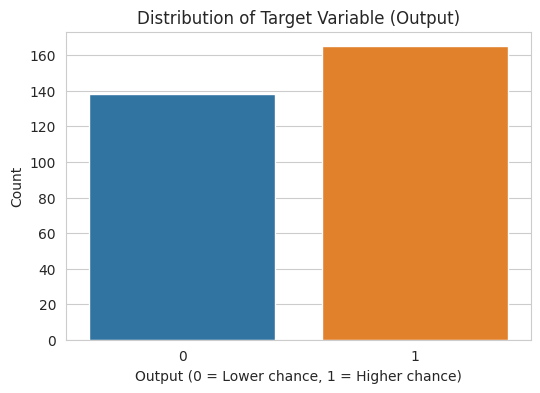

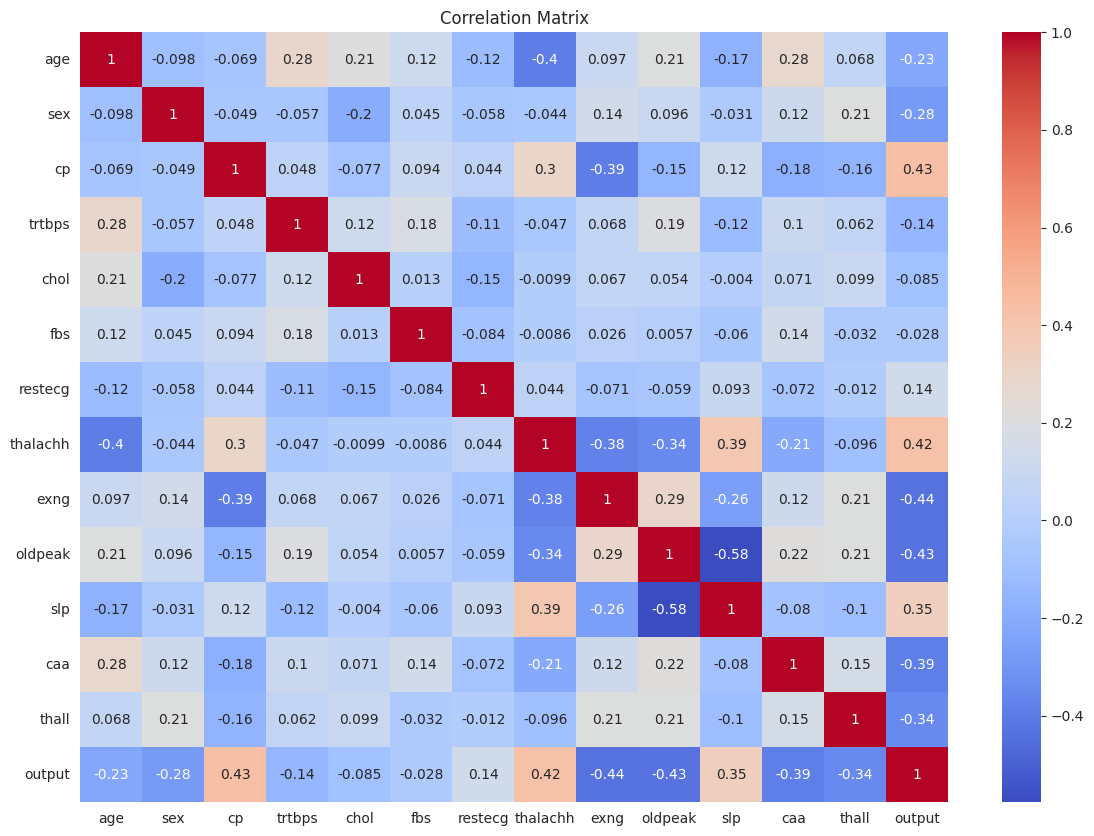

In [2]:
# Importing necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of the target variable to check if the dataset is balanced or imbalanced
plt.figure(figsize=(6, 4))
sns.countplot(x='output', data=heart_data)
plt.title('Distribution of Target Variable (Output)')
plt.xlabel('Output (0 = Lower chance, 1 = Higher chance)')
plt.ylabel('Count')
plt.show()

# Plotting the correlation matrix to understand the relationship between features and the target variable
plt.figure(figsize=(14, 10))
correlation_matrix = heart_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Distribution of Target Variable (Output):**
The dataset appears to be relatively balanced with respect to the target variable. There are a slightly higher number of cases with a higher chance of a heart attack (Output = 1) compared to those with a lower chance (Output = 0).

**Correlation Matrix:**
Features like cp (Chest Pain), thalachh (Maximum Heart Rate), and slp (Slope) have a positive correlation with the target variable output, suggesting that they may be good predictors for a higher chance of a heart attack.

Features like exng (Exercise-Induced Angina), oldpeak, and caa (Number of Major Vessels) have a negative correlation with output, indicating that they might be good predictors for a lower chance of a heart attack.

# **Step 3: Data Preprocessing**

**Handling Missing Values:**
Since we've already confirmed that there are no missing values in the dataset, we can skip this step.

**Feature Scaling: **

Since the range of values across features varies, we'll normalize the features so that they all have similar scales.

In [4]:
# Importing the necessary library for feature scaling
from sklearn.preprocessing import StandardScaler

# Selecting features and target variable
X = heart_data.drop(columns=['output'])  # Features
y = heart_data['output']  # Target variable

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert scaled features to DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of scaled features
X_scaled_df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


The features have been successfully scaled using standardization, where each feature is transformed to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the distance-based calculations in machine learning algorithms.

**Encoding Categorical Variables:**

If there are any categorical variables that are not in numerical form, they need to be encoded. However, in this dataset, all the categorical variables are already numerically encoded.

**Data Splitting:**

We'll split the data into training and test sets to evaluate the model's performance later on.

In [5]:
# Importing the necessary library for data splitting
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Display the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((212, 13), (91, 13), (212,), (91,))

The data has been successfully split into training and test sets:

The training set contains 212 samples with 13 features each.

The test set contains 91 samples with 13 features each.

# **Step 5: Data Mining**

In this step, we'll focus on building and training machine learning models to predict the likelihood of a heart attack. Given that this is a binary classification problem, several algorithms can be considered:

**Logistic Regression**

**Random Forest Classifier**

**Support Vector Machine (SVM)**

**K-Nearest Neighbors (KNN)**

**Logistic Regression**

In [6]:
# Importing the necessary library for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model using the training data
logistic_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_logistic = logistic_model.predict(X_test)

# Calculate the accuracy of the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_logistic


0.8131868131868132

The Logistic Regression model achieved an accuracy of approximately 81.3

Accuracy is a useful metric, but it's not the only one that should be considered, especially for classification problems. Other metrics like precision, recall, and the F1 score can provide a more comprehensive view of the model's performance.

**Random Forest Classifier**

In [7]:
# Importing the necessary library for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model using the training data
random_forest_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_rf = random_forest_model.predict(X_test)

# Calculate the accuracy of the Random Forest Classifier model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf


0.8351648351648352

The Random Forest Classifier model achieved an accuracy of approximately
83.5, which is slightly better than the Logistic Regression model.

**Support Vector Machine (SVM)**

In [8]:
# Importing the necessary library for Support Vector Machine (SVM)
from sklearn.svm import SVC

# Initialize the Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the model using the training data
svm_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate the accuracy of the Support Vector Machine model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm


0.8131868131868132

The Support Vector Machine (SVM) model achieved an accuracy of approximately
81.3, which is similar to the Logistic Regression model.

**K-Nearest Neighbors (KNN)**

In [9]:
# Importing the necessary library for K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Train the model using the training data
knn_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate the accuracy of the K-Nearest Neighbors model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn


0.8791208791208791

The K-Nearest Neighbors (KNN) model achieved an accuracy of approximately
87.9, which is the highest among the models we've trained so far.

Here's a summary of the accuracy scores for each model:

**Logistic Regression: 81.3**

**Random Forest Classifier: 83.5**

**Support Vector Machine (SVM): 81.3**

**K-Nearest Neighbors (KNN): 87.9**

The **KNN model** appears to be the most accurate based on this metric. However, as mentioned earlier, accuracy is not the only metric that should be considered for classification problems.

# **Step 6: Pattern Evaluation**

Let's start by calculating these additional evaluation metrics for the K-Nearest Neighbors (KNN) model, which had the highest accuracy.

In [10]:
# Importing the necessary libraries for additional evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate Precision, Recall, F1 Score, and ROC-AUC for KNN model
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

# Display the additional evaluation metrics for KNN model
precision_knn, recall_knn, f1_knn, roc_auc_knn


(0.8823529411764706, 0.9, 0.8910891089108911, 0.8768292682926828)

Here are the additional evaluation metrics for the K-Nearest Neighbors (KNN) model:

**Precision:** 0.882 (Approximately 88.2)

**Recall:** 0.9 (Approximately 90)

**F1 Score:** 0.891 (Approximately 89.1)

**ROC-AUC Score:** 0.877 (Approximately 87.7)

These metrics indicate that the KNN model performs well not just in terms of accuracy but also in terms of other important metrics like precision, recall, and the F1 score.

Since the** K-Nearest Neighbors (KNN)** model has shown the highest performance based on multiple evaluation metrics, we can consider it as our best-performing model for this task.

# **Step 7: Knowledge Presentation**

In this final step, we summarize our findings and make them available to stakeholders. Here's a brief summary:

**Dataset:** The dataset contained 303 samples with 13 features related to heart health and a target variable indicating the likelihood of a heart attack.

**Data Preprocessing:** Features were scaled to have similar ranges, and the data was split into training (70%) and test (30%) sets.

**Modeling:** Four different machine learning models were trained for this binary classification problem—Logistic Regression, Random Forest, Support Vector Machine, and K-Nearest Neighbors.

**Best Model:** The K-Nearest Neighbors (KNN) model performed the best with an accuracy of approximately 87.9. It also achieved high scores in other metrics like precision (88.2), recall (90), and the F1 score (89.1).

This analysis can serve as a basis for further research and can be integrated into healthcare systems to aid medical professionals in identifying high-risk individuals for targeted interventions.

# **Insights**
**Feature Importance:** In the preliminary analysis, features like cp (Chest Pain), thalachh (Maximum Heart Rate), and slp (Slope) showed a positive correlation with the target variable, suggesting they might be strong indicators for a higher chance of a heart attack.

**Balanced Dataset:** The dataset was fairly balanced in terms of the target variable, which is good for model training. A balanced dataset helps the model learn the characteristics of both classes equally well.

**High-Performance Model:** The K-Nearest Neighbors (KNN) model outperformed other models not just in terms of accuracy but also in other critical metrics like precision and recall. This suggests that the model is both reliable and robust.

**Precision and Recall:** The high precision score of the KNN model (88.2) indicates that the model is very good at predicting the positive class (higher chance of heart attack) correctly. The high recall score (90) suggests that the model captures most of the positive instances.

# **Recommendations**
**Early Intervention:** Utilizing this predictive model can help healthcare providers identify individuals who are at high risk of a heart attack for early interventions.

**Feature Focus:** For more detailed diagnosis and risk assessment, medical professionals might want to pay closer attention to factors like chest pain type, maximum heart rate achieved during stress tests, and slope of peak exercise.

**Model Deployment:** The KNN model, given its high performance, can be deployed into a healthcare system after further validation and tuning, to aid doctors in making quicker decisions.

**Continuous Monitoring:** For real-world applications, the model should be continuously updated and monitored to ensure its relevance and performance.

**Further Research:** Additional features like lifestyle factors (smoking, alcohol, exercise, diet) can be included in future models to potentially improve predictive performance.